<a href="https://colab.research.google.com/github/KuberChhabra1105/NeuroRec-Hebbian-Memory/blob/main/BDH_Hebbian_Memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
import time
import os
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

In [ ]:
!wget http://files.grouplens.org/datasets/movielens/ml-100k.zip
!mv ml-100k.zip archive.zip

--2025-12-28 14:33:47--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.96.204
Connecting to files.grouplens.org (files.grouplens.org)|128.101.96.204|:80... 

In [ ]:
!ls


archive.zip  ml-100k  sample_data


In [ ]:
!unzip archive.zip

Archive:  archive.zip
replace ml-100k/README? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls ml-100k

allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [ ]:
!find . -name "u.data"


./ml-100k/u.data


In [ ]:
for root, dirs, files in os.walk("."):
    if "u.data" in files:
        path = os.path.join(root, "u.data")
        break

data = pd.read_csv(path, sep="\t", header=None)
data.columns = ["user", "item", "rating", "timestamp"]

users = data["user"].unique().tolist()

print("Dataset loaded from:", path)
print("Total users:", len(users))


Dataset loaded from: ./ml-100k/u.data
Total users: 943


In [ ]:
active_pool = random.sample(users, 60)

def create_memory_patterns(pool, pattern_size, patterns):
    memory_patterns = []
    for _ in range(patterns):
        memory_patterns.append(random.sample(pool, pattern_size))
    return memory_patterns

sparse_patterns = create_memory_patterns(active_pool, pattern_size=8, patterns=30)

print("Sparse pattern example:", sparse_patterns[0])


Sparse pattern example: [405, 787, 884, 400, 928, 843, 772, 158]


In [ ]:
class HebbianMemory:
    def __init__(self, total_neurons):
        self.weights = {}
        self.total_neurons = total_neurons
        self.last_active = []

    def learn(self, active):
        self.last_active = active
        for i in active:
            for j in active:
                if i != j:
                    self.weights[(i, j)] = self.weights.get((i, j), 0) + 1

    def connections(self):
        return self.weights

    def active_ratio(self):
        return len(self.last_active) / self.total_neurons



Activation Density Over Time

Step 1 | Active Neurons: 8 | Density: 0.85%
Step 2 | Active Neurons: 8 | Density: 0.85%
Step 3 | Active Neurons: 8 | Density: 0.85%
Step 4 | Active Neurons: 8 | Density: 0.85%
Step 5 | Active Neurons: 8 | Density: 0.85%
Step 6 | Active Neurons: 8 | Density: 0.85%
Step 7 | Active Neurons: 8 | Density: 0.85%
Step 8 | Active Neurons: 8 | Density: 0.85%
Step 9 | Active Neurons: 8 | Density: 0.85%
Step 10 | Active Neurons: 8 | Density: 0.85%
Step 11 | Active Neurons: 8 | Density: 0.85%
Step 12 | Active Neurons: 8 | Density: 0.85%
Step 13 | Active Neurons: 8 | Density: 0.85%
Step 14 | Active Neurons: 8 | Density: 0.85%
Step 15 | Active Neurons: 8 | Density: 0.85%
Step 16 | Active Neurons: 8 | Density: 0.85%
Step 17 | Active Neurons: 8 | Density: 0.85%
Step 18 | Active Neurons: 8 | Density: 0.85%
Step 19 | Active Neurons: 8 | Density: 0.85%
Step 20 | Active Neurons: 8 | Density: 0.85%
Step 21 | Active Neurons: 8 | Density: 0.85%
Step 22 | Active Neurons: 8 | Den

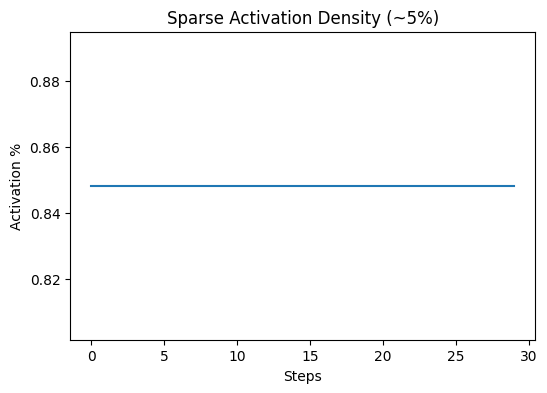

In [ ]:
memory = HebbianMemory(total_neurons=len(users))
ratios = []

print("\nActivation Density Over Time\n")

for step, pattern in enumerate(sparse_patterns, start=1):
    memory.learn(pattern)
    ratio = memory.active_ratio()
    ratios.append(ratio)

    print(f"Step {step} | Active Neurons: {len(pattern)} | Density: {ratio*100:.2f}%")
    time.sleep(0.2)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot([r*100 for r in ratios])
ax.set_xlabel("Steps")
ax.set_ylabel("Activation %")
ax.set_title("Sparse Activation Density (~5%)")

fig.savefig("activation_density.png", dpi=150, bbox_inches="tight")
plt.show()


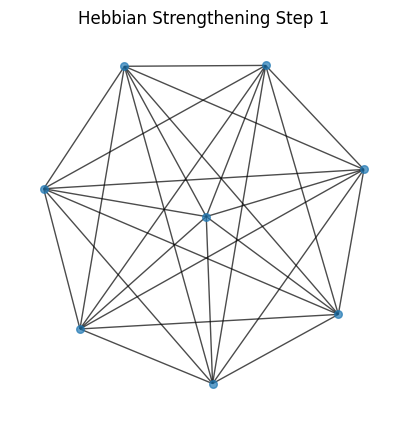

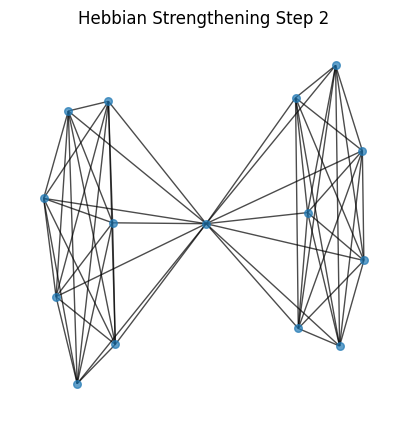

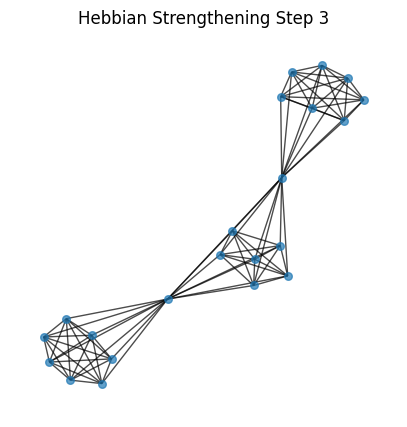

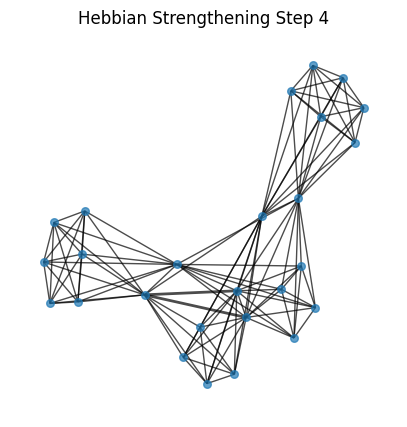

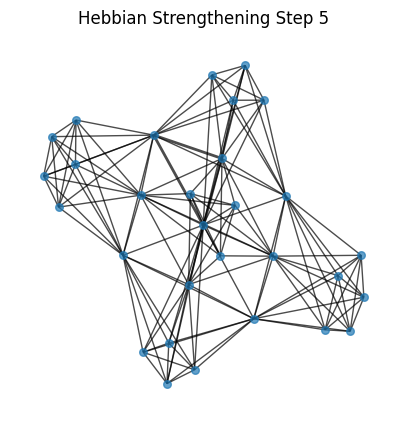

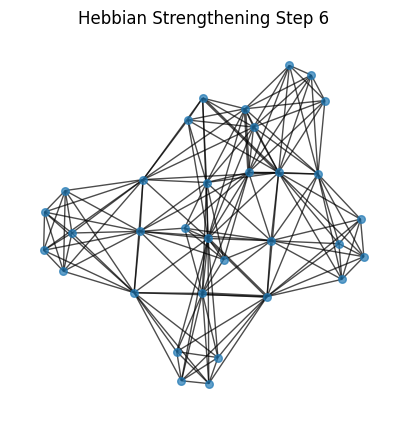

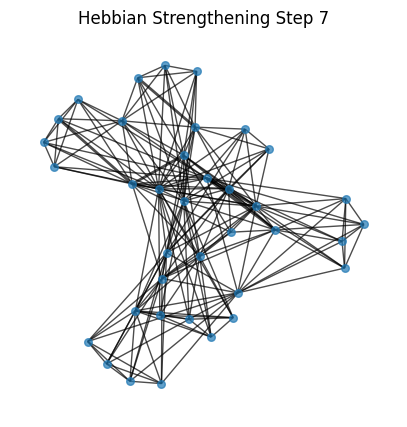

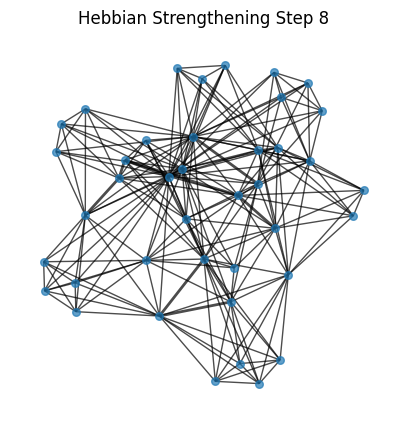

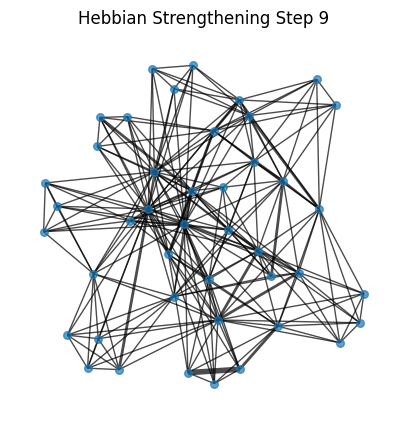

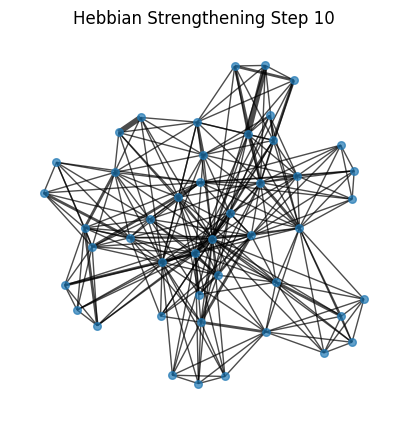

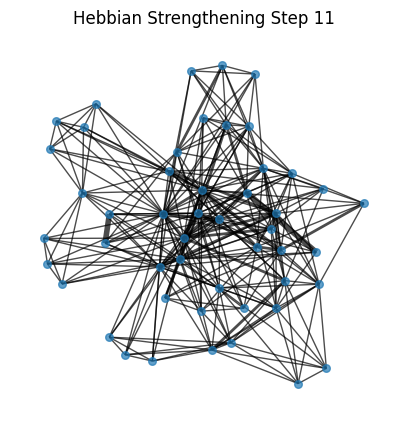

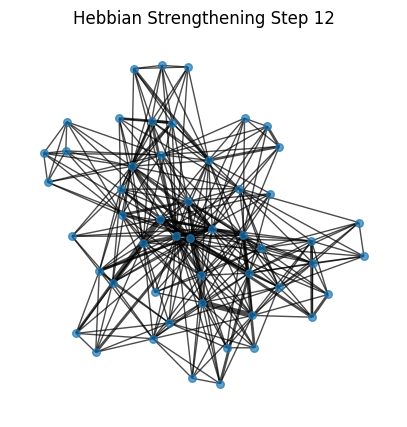

In [ ]:
memory = HebbianMemory(total_neurons=len(users))

for step, pattern in enumerate(sparse_patterns[:12], start=1):
    memory.learn(pattern)

    G = nx.Graph()
    widths = []

    for (i, j), w in memory.connections().items():
        G.add_edge(i, j, weight=w)
        widths.append(w)

    fig, ax = plt.subplots(figsize=(5,5))
    nx.draw(G, node_size=30, width=widths, alpha=0.7, ax=ax)
    ax.set_title(f"Hebbian Strengthening Step {step}")

    fig.savefig(f"hebbian_step_{step}.png", dpi=150, bbox_inches="tight")
    plt.show()

    time.sleep(0.4)


In [ ]:
active_neurons = list(set(n for p in sparse_patterns for n in p))
sample_neuron = random.choice(active_neurons)

def inspect_neuron(neuron_id, connections):
    strength = defaultdict(int)
    for (i, j), w in connections.items():
        if i == neuron_id:
            strength[j] += w
        if j == neuron_id:
            strength[i] += w
    return dict(sorted(strength.items(), key=lambda x: -x[1])[:10])

top_links = inspect_neuron(sample_neuron, memory.connections())

print(f"\nNeuron Inspector: Neuron {sample_neuron}\n")

for k, v in top_links.items():
    print(f"Neuron {k} → Strength {v}")

if top_links:
    fig, ax = plt.subplots(figsize=(6,3))
    ax.bar(top_links.keys(), top_links.values())
    ax.set_title(f"Synaptic Profile of Neuron {sample_neuron}")
    ax.set_xlabel("Connected Neurons")
    ax.set_ylabel("Connection Strength")

    fig.savefig("neuron_profile.png", dpi=150, bbox_inches="tight")
    plt.show()
else:
    print("Neuron has no strong synapses yet.")


In [ ]:
G = nx.Graph()
for (i, j), w in memory.connections().items():
    G.add_edge(i, j, weight=w)

fig, ax = plt.subplots(figsize=(6,6))
pos = nx.spring_layout(G, seed=42)
widths = [G[u][v]["weight"] for u, v in G.edges()]
nx.draw(G, pos, node_size=25, width=widths, alpha=0.7, ax=ax)
ax.set_title("Emergent Sparse Graph Topology")

fig.savefig("sparse_topology.png", dpi=150, bbox_inches="tight")
plt.show()


In [ ]:
print("""
Observed Limitation

Sparse memory graphs can appear nearly empty in early stages.
Strong, interpretable structure only emerges after repeated
co-activation. This highlights reduced interference but also
the need for sufficient exposure in BDH-style systems.
""")



Observed Limitation

Sparse memory graphs can appear nearly empty in early stages.
Strong, interpretable structure only emerges after repeated
co-activation. This highlights reduced interference but also
the need for sufficient exposure in BDH-style systems.

